In [30]:
from google.colab import files
uploaded=files.upload()

Saving AAPL.csv to AAPL (2).csv


 Data Manipulation library

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import datetime as dt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [33]:
data = pd.read_csv("AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [5]:
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2001,2019-12-16,277.000000,280.790009,276.980011,279.859985,277.942474,32046500
2002,2019-12-17,279.570007,281.769989,278.799988,280.410004,278.488770,28539600
2003,2019-12-18,279.799988,281.899994,279.119995,279.739990,277.823334,29007100
2004,2019-12-19,279.500000,281.179993,278.950012,280.019989,278.101410,24592300
2005,2019-12-20,282.230011,282.649994,278.559998,279.440002,277.525391,68994500
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [7]:
print('shape of data :',data.shape)
print("*******************************************")
print('name of column present :',data.columns)

shape of data : (2011, 7)
*******************************************
name of column present : Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


<Figure size 144x144 with 0 Axes>

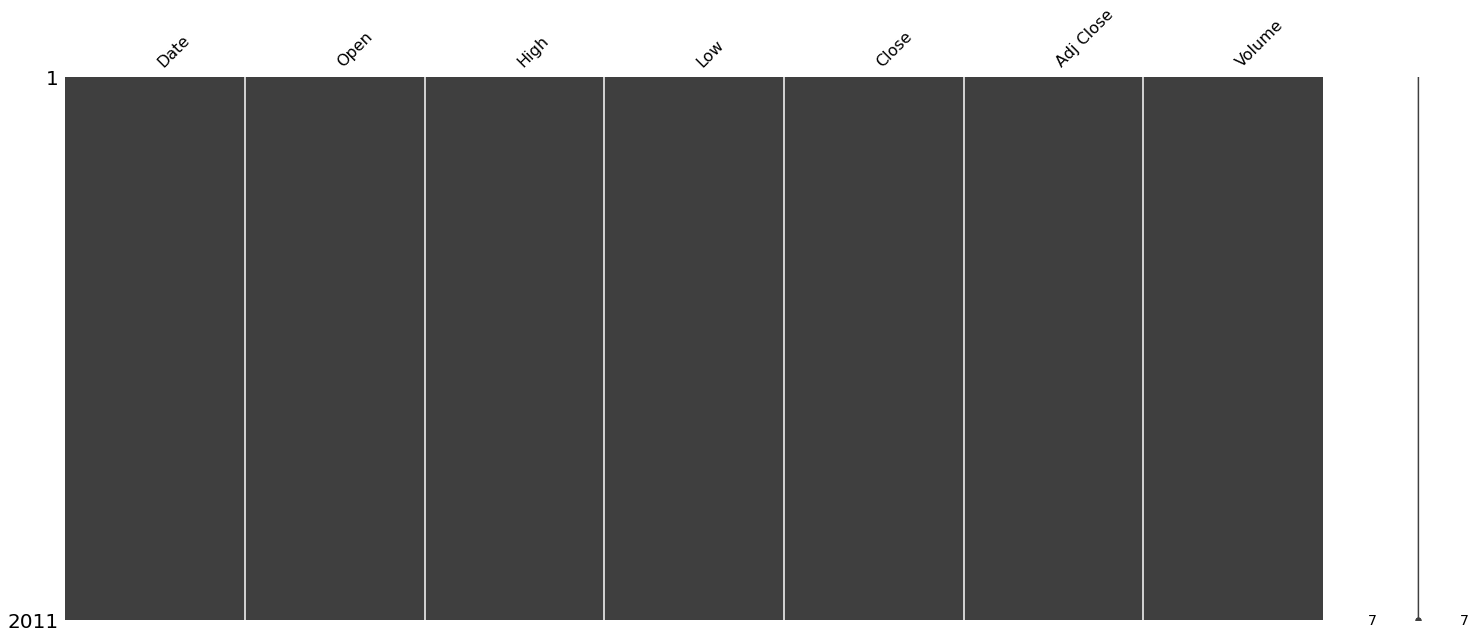

In [8]:
# checking Missing Info
plt.figure(figsize=(2,2))
msno.matrix(data)

 insight from graph : there is no missing Info in our data

In [9]:
# statistical insights into the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2011.0,1.267075e+02,5.048375e+01,5.542429e+01,8.588286e+01,1.130500e+02,1.651900e+02,2.911200e+02
High,2011.0,1.278276e+02,5.092630e+01,5.708571e+01,8.671786e+01,1.141900e+02,1.674100e+02,2.939700e+02
Low,2011.0,1.255803e+02,5.012494e+01,5.501429e+01,8.505643e+01,1.118700e+02,1.634250e+02,2.881200e+02
Close,2011.0,1.267412e+02,5.057837e+01,5.579000e+01,8.620214e+01,1.130500e+02,1.652450e+02,2.915200e+02
Adj Close,2011.0,1.195055e+02,5.243844e+01,4.892193e+01,7.505668e+01,1.052229e+02,1.600471e+02,2.895226e+02
Volume,2011.0,5.949670e+07,4.683856e+07,1.136200e+07,2.758565e+07,4.346900e+07,7.471030e+07,3.765300e+08


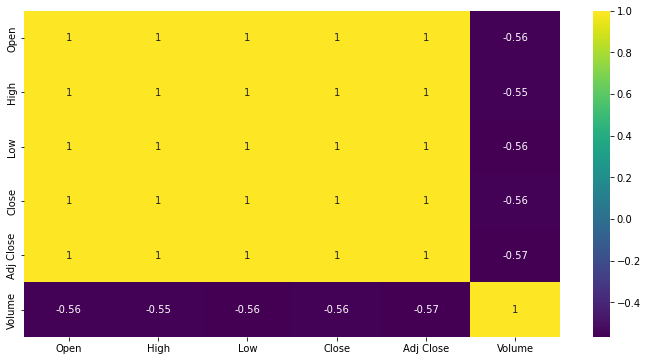

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot = True,cmap = 'viridis')

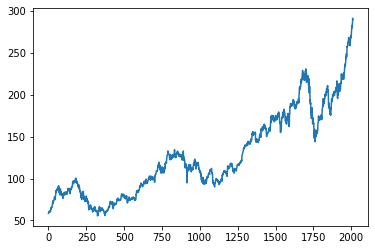

In [11]:
# for general Idea hows stock graph look like
data.Open.plot()

Text(0.5, 0, 'Open_price')

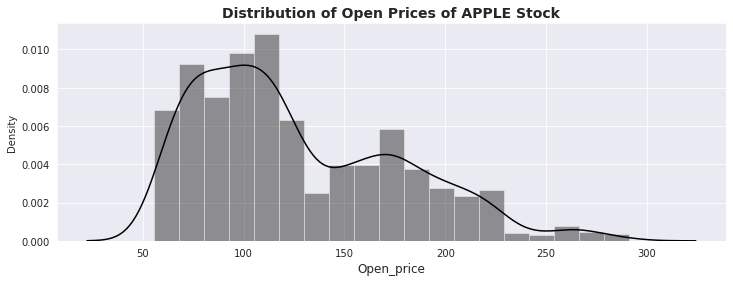

In [13]:
# normal distribution curve
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.distplot(data['Open'],color = 'k')
plt.title('Distribution of Open Prices of APPLE Stock',fontweight = 'bold',fontsize= 14)
plt.xlabel('Open_price',fontsize=12)

In [14]:
print("Maximum Open price of stock ever obtained:",data['Open'].max())
print("*"*50)
print("Minimum Open price of stock ever obtained :",data['Open'].min())
print("*"*50)

Maximum Open price of stock ever obtained: 291.119995
**************************************************
Minimum Open price of stock ever obtained : 55.424286
**************************************************


Maximum close price of stock ever obtained: 291.519989
Minimum close price of stock ever obtained: 55.790001


**************************************************
Maximum high price of stock ever obtained: 293.970001
Minimum high price of stock ever obtained: 57.085712


**************************************************
Maximum low price of stock ever obtained: 288.119995
Minimum low price of stock ever obtained: 55.014286


after watcing curve this curve is bimode(right skewd distribution)


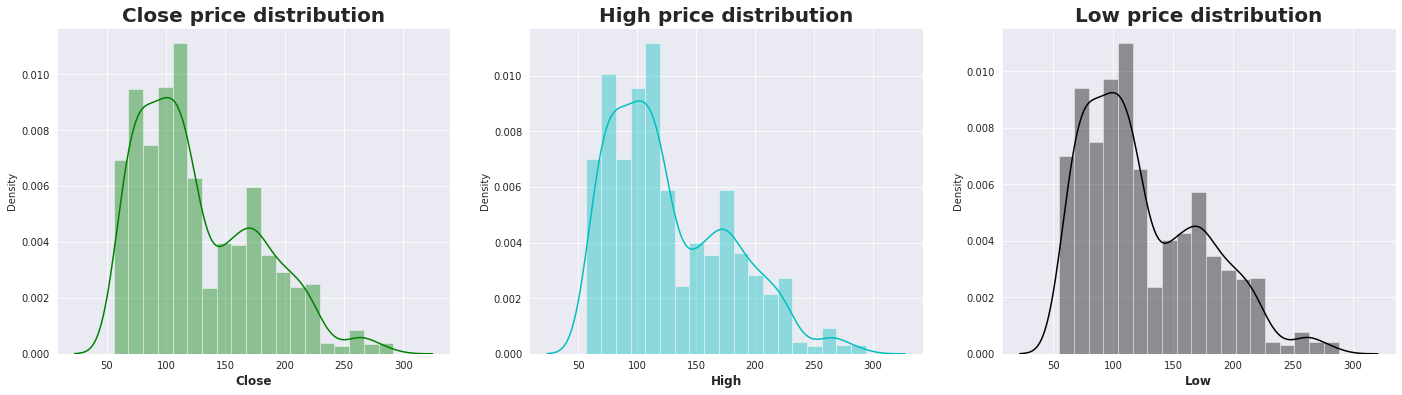

In [16]:
# Close price high price and low price
fig,axes=plt.subplots(1,3,figsize=(24,6))

#Close price
plt.subplot(1,3,1)
plt.title('Close price distribution',fontweight='bold',fontsize=20)
plt.xlabel('close_price',fontweight='bold',fontsize=12)
sns.distplot(data['Close'],color='g')

print('Maximum close price of stock ever obtained:',data['Close'].max())
print('Minimum close price of stock ever obtained:',data['Close'].min())
print('\n')
print("*"*50)

#High price
plt.subplot(1,3,2)
plt.title('High price distribution',fontweight='bold',fontsize=20)
plt.xlabel('high_price',fontweight='bold',fontsize=12)
sns.distplot(data['High'],color='c')

print('Maximum high price of stock ever obtained:',data['High'].max())
print('Minimum high price of stock ever obtained:',data['High'].min())
print('\n')
print("*"*50)

#Low price
plt.subplot(1,3,3)
plt.title('Low price distribution',fontweight='bold',fontsize=20)
plt.xlabel('low_price',fontweight='bold',fontsize=12)
sns.distplot(data['Low'],color='black')

print('Maximum low price of stock ever obtained:',data['Low'].max())
print('Minimum low price of stock ever obtained:',data['Low'].min())

print('\n')

print("after watcing curve this curve is bimode(right skewd distribution)")

In [34]:
# converting String object to datetime for analysis
data['Date'] = pd.to_datetime(data['Date'])
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500


In [35]:
# set date column as index
data.set_index('Date',inplace=True)

In [ ]:
fig=px.line(x=data['year'],y=data['Open'])
fig.update_layout(template='plotly_dark',title='Year wise open price distribution',xaxis_title = 'year',yaxis_title='Open_price')

In [ ]:
#Getting the dates on which the maximum and the minimum open price values of the stocks were observed.

for i in data['Open'].index:
    if (data['Open'][i]==data['Open'].max()):
        print('The maximum stock price of APPL were observed on: ', data['date'][i])
        print("*"*50)
    elif (df['Open'][i]==data['Open'].min()):
        print('The minimum stock price of APPL were observed on: ', data['date'][i])
        print("*"*50)
    else:
        pass

The minimum stock price of APPL were observed on:  2013-04-19 00:00:00
**************************************************
The maximum stock price of APPL were observed on:  2019-12-27 00:00:00
**************************************************


In [ ]:
fig=make_subplots(rows=1,cols=3)

#Close price
fig.add_trace(go.Scatter(x=data['year'],y=data['Close'],mode='markers',name='close_price'),row=1,col=1)


#High price
fig.add_trace(go.Scatter(x=data['year'],y=data['High'],mode='markers',name='high_price'),row=1,col=2)


#Low price
fig.add_trace(go.Scatter(x=data['year'],y=data['Low'],mode='markers',name='low_price'),row=1,col=3)

fig.update_layout(template='plotly_dark',title='Year wise distribution',xaxis_title='year',yaxis_title='price')

volme of stock traded

In [ ]:
fig=px.line(x=data['year'],y=data['Volume'])
fig.update_layout(template='plotly_dark',title='Year wise volume traded',xaxis_title='year',yaxis_title='volume')
fig.show()

print('Maximum low price of stock ever obtained:',data['Low'].max())
print('Minimum low price of stock ever obtained:',data['Low'].min())

print('\n')

for i in data['Volume'].index:
    if (data['Volume'][i]==data['Volume'].max()):
        print('The maximum volume ever traded was on: ', data['date'][i])
    elif (df['Volume'][i]==data['Volume'].min()):
        print('The minimum volume ever traded was on: ', data['date'][i])
    else:
        pass

Maximum low price of stock ever obtained: 288.119995
Minimum low price of stock ever obtained: 55.014286


The maximum volume ever traded was on:  2012-02-15 00:00:00
The minimum volume ever traded was on:  2019-07-03 00:00:00


In [ ]:
fig=px.line(x=data['year'],y=data['Volume']*data['Open'])
fig.update_layout(template='plotly_dark',title='Year wise volume traded',xaxis_title='year',yaxis_title='amount')
fig.show()

#model creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math

In [ ]:
#PREPARING THE DATA

data.sort_index(ascending=False,axis=0,inplace=True)
df=data[['date','Close']]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,Close
date,
2019-12-30,291.519989
2019-12-27,289.799988
2019-12-26,289.910004
2019-12-24,284.269989
2019-12-23,284.000000


In [ ]:
#To array format
df_val=df.values 
df_val

array([[291.519989],
       [289.799988],
       [289.910004],
       ...,
       [ 59.718571],
       [ 59.062859],
       [ 58.747143]])

In [ ]:
#Splitting the dataset to train and test (80% train and 20% test data)

train=df_val[:497]   
test=df_val[497:]

In [ ]:
#Scaling the features to be valued between 0 & 1. 
#Scaling ensures optimal performance of the model.

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_val)

In [ ]:
#Creting x_train and y_train for 60 timesteps
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Converting to 3-D array because LSTM model requires 3-D input.
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# Build the LSTM model
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))


#Compiling 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting
model.fit(x_train, y_train, epochs = 145, batch_size = 10)

Epoch 1/145
44/44 [==============================] - 10s 76ms/step - loss: 0.0298
Epoch 2/145
44/44 [==============================] - 3s 76ms/step - loss: 0.0077
Epoch 3/145
44/44 [==============================] - 3s 77ms/step - loss: 0.0055
Epoch 4/145
44/44 [==============================] - 4s 86ms/step - loss: 0.0052
Epoch 5/145
44/44 [==============================] - 4s 94ms/step - loss: 0.0047
Epoch 6/145
44/44 [==============================] - 3s 76ms/step - loss: 0.0059
Epoch 7/145
44/44 [==============================] - 3s 77ms/step - loss: 0.0049
Epoch 8/145
44/44 [==============================] - 3s 76ms/step - loss: 0.0041
Epoch 9/145
44/44 [==============================] - 3s 76ms/step - loss: 0.0043
Epoch 10/145
44/44 [==============================] - 3s 75ms/step - loss: 0.0035
Epoch 11/145
44/44 [==============================] - 3s 75ms/step - loss: 0.0037
Epoch 12/145
44/44 [==============================] - 3s 75ms/step - loss: 0.0045
Epoch 13/145
44/44 [====

In [ ]:
inputs = df_val[len(df_val) - len(test) - 60:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
#Test data
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predictions = model.predict(X_test)

#Undo scaling
predictions = scaler.inverse_transform(predictions)

48/48 [==============================] - 3s 36ms/step


In [ ]:
#Root mean squared error
rmse=np.sqrt(np.mean(np.power((predictions),2)))
rmse

113.94489

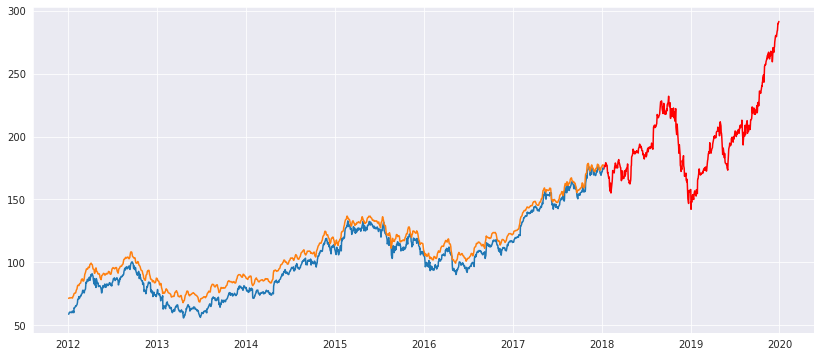

In [ ]:
#Plotting all the values
train = df[:497]
test = df[497:]
test['Predictions'] = predictions
sns.set_style('darkgrid')
plt.figure(figsize=(14,6))
plt.plot(train['Close'],color='r')
plt.plot(test[['Close','Predictions']])

DICKEY FULLER TEST

In [36]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data["Close"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.219370
p-value: 0.996117


As the p-value of the test is less than the significance level (0.05) , so we reject the null hypothesis and infer that the time series is stationary.

Making the differencing and ploting the autocorelation plots

Partial autocorrelation plots to find the p value relate to Auto regression(AR)

In [40]:
data_close = pd.DataFrame(data['Close'])
data_close.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


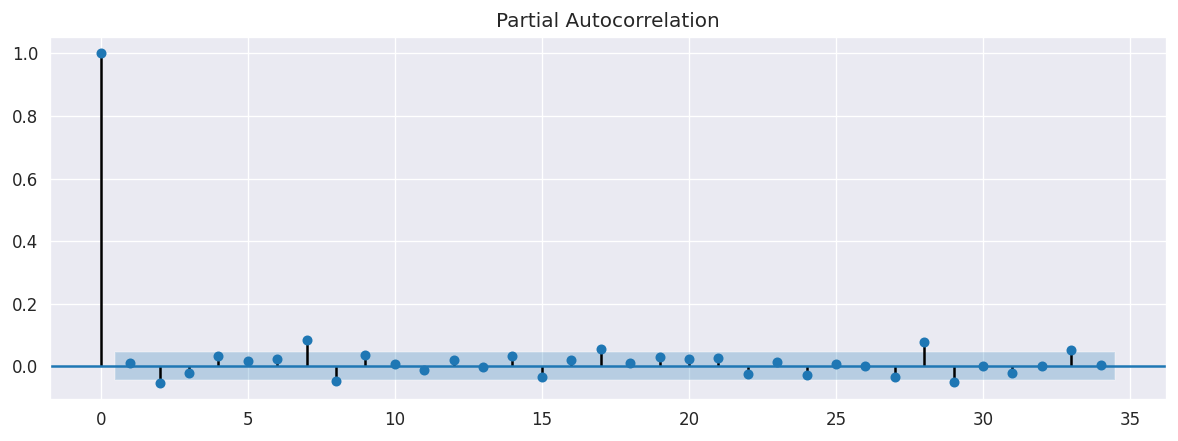

In [41]:
# PACF plot of 1st differenced series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(data_close['Close'].diff().dropna())
plt.show()

Auto correlation plots to find the q value realted to moving average (MA)

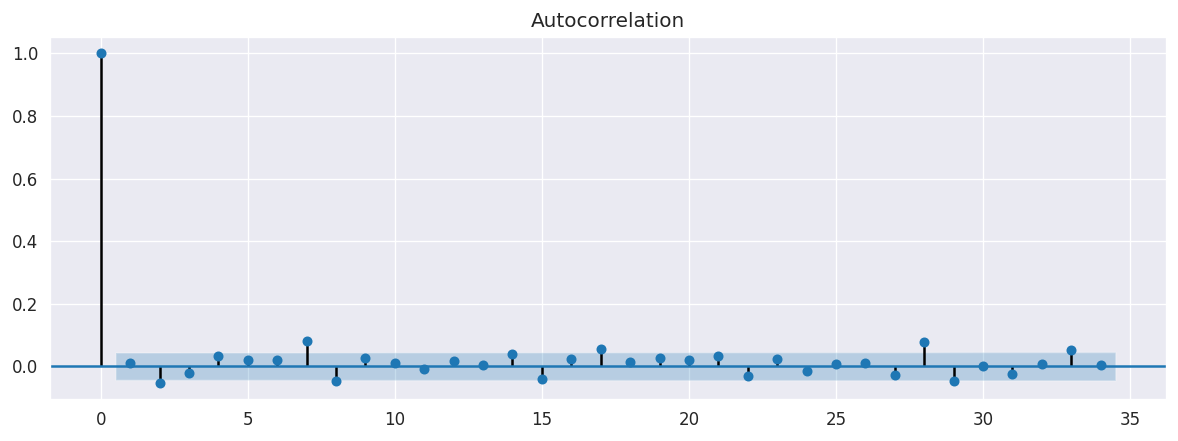

In [42]:
plot_acf(data_close['Close'].diff().dropna())
plt.show()

ARIMA MODEL FITTING

In [98]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(data.Close, order=(2,1,0))
model_fit = model.fit(disp=0)

In [99]:
model_arima = ARIMA(data_close['Close'],order=(2,1,0))
arima_fit = model_arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2010
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4365.986
Method:                       css-mle   S.D. of innovations              2.124
Date:                Mon, 05 Dec 2022   AIC                           8739.973
Time:                        12:52:19   BIC                           8762.397
Sample:                             1   HQIC                          8748.204
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1158      0.045      2.545      0.011       0.027       0.205
ar.L1.D.Close     0.0118      0.022      0.531      0.595      -0.032       0.055
ar.L2.D.Close    -0.0534      0.022     -2.397      0.017      -0.097      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1108           -4.3274j            4.3288           -0.2459
AR.2            0.1108           +4.3274j            4.3288            0.2459
-----------------------------------------------------------------------------
"""

In [100]:
prediction = pd.DataFrame(arima_fit.predict(typ='levels'))
prediction.columns=['Close']
prediction

,Close
Date,
2012-01-04,58.862907
2012-01-05,59.180868
2012-01-06,59.830051
2012-01-09,60.435822
2012-01-10,60.333267
...,...
2019-12-23,279.538770
2019-12-24,284.205468
2019-12-26,284.150406


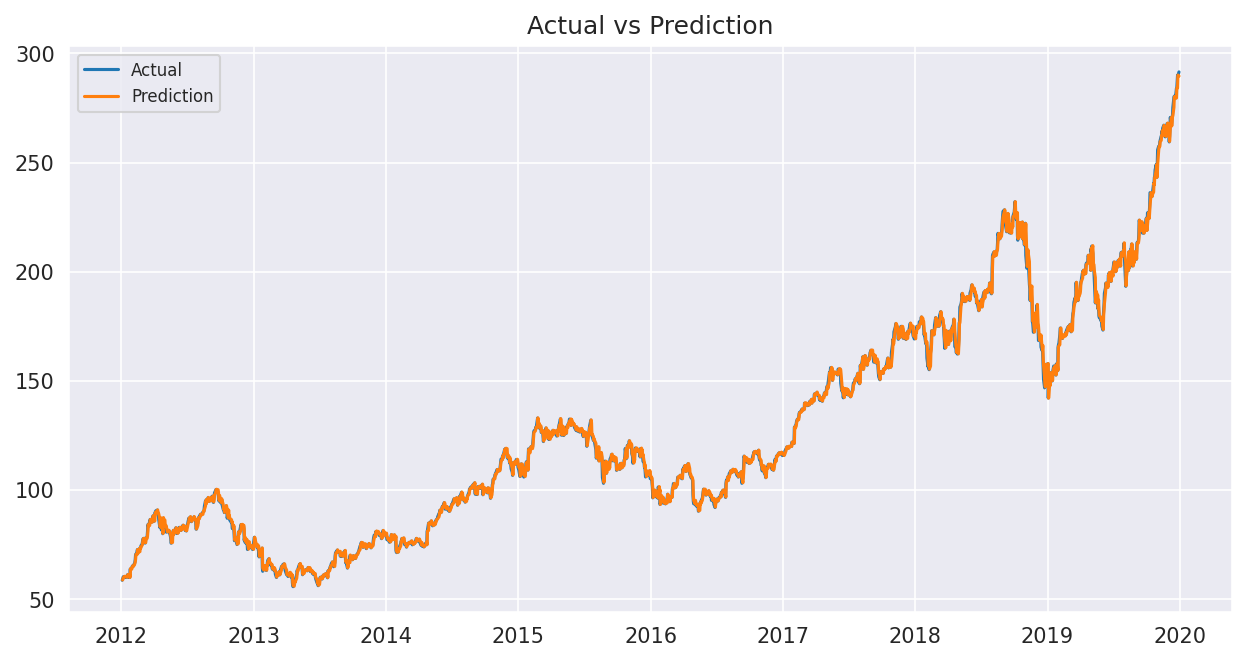

In [101]:
plt.figure(figsize=(10,5), dpi=150)
plt.plot(data_close['Close'], label='Actual')
plt.plot(prediction, label='Prediction')
plt.title('Actual vs Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

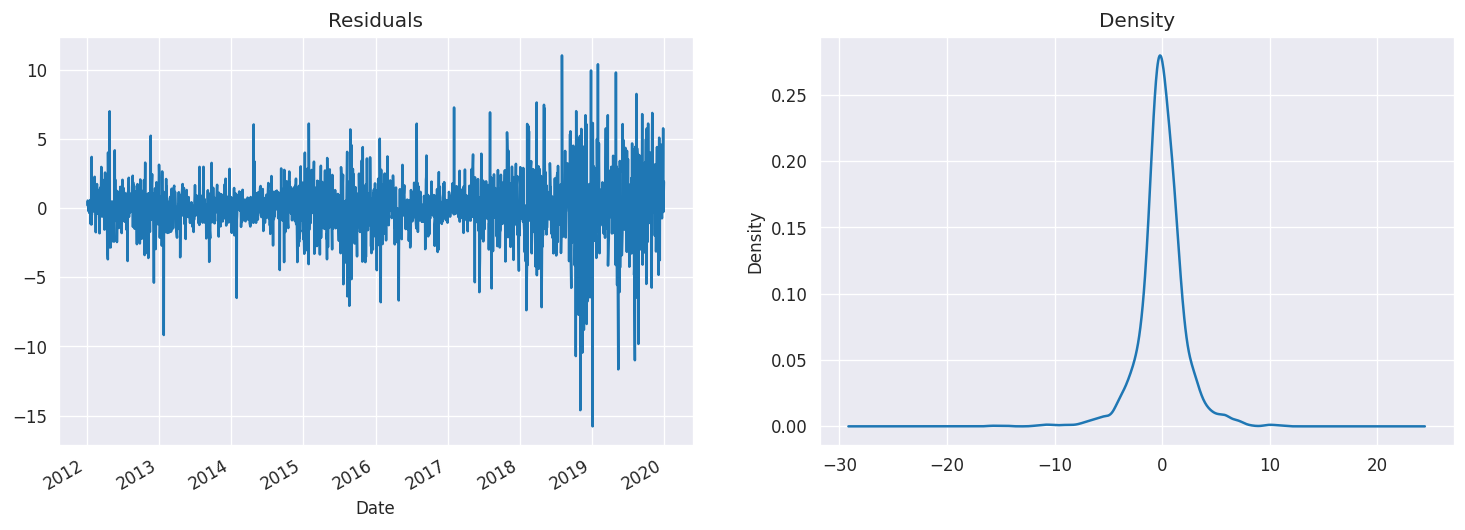

In [102]:
# Residual plot
residuals = arima_fit.resid

fig, axs = plt.subplots(1,2,figsize=(15,5))
residuals.plot(title="Residuals", ax=axs[0])
residuals.plot(kind='kde', title='Density', ax=axs[1])
plt.show()

In [103]:
data_train = data_close.loc[:'2017-12-29']
data_test = data_close.loc['2018-01-02':]

In [104]:
data_test

,Close
Date,
2018-01-02,172.259995
2018-01-03,172.229996
2018-01-04,173.029999
2018-01-05,175.000000
2018-01-08,174.350006
...,...
2019-12-23,284.000000
2019-12-24,284.269989
2019-12-26,289.910004


In [105]:
model_arima = ARIMA(data_train['Close'],order=(2,1,0))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1508
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2792.465
Method:                       css-mle   S.D. of innovations              1.542
Date:                Mon, 05 Dec 2022   AIC                           5592.930
Time:                        12:52:49   BIC                           5614.204
Sample:                             1   HQIC                          5600.853
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0733      0.039      1.867      0.062      -0.004       0.150
ar.L1.D.Close     0.0245      0.026      0.953      0.341      -0.026       0.075
ar.L2.D.Close    -0.0364      0.026     -1.414      0.157      -0.087       0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3370           -5.2307j            5.2415           -0.2398
AR.2            0.3370           +5.2307j            5.2415            0.2398
-----------------------------------------------------------------------------
"""

In [106]:
test_pred = pd.DataFrame(result.predict(len(data_train),len(data_train)+501,typ='levels'))
test_pred.index = data_test.index
test_pred.columns=data_test.columns
test_pred

,Close
Date,
2018-01-02,169.241266
2018-01-03,169.383003
2018-01-04,169.460193
2018-01-05,169.531051
2018-01-08,169.604103
...,...
2019-12-23,205.718391
2019-12-24,205.791645
2019-12-26,205.864899


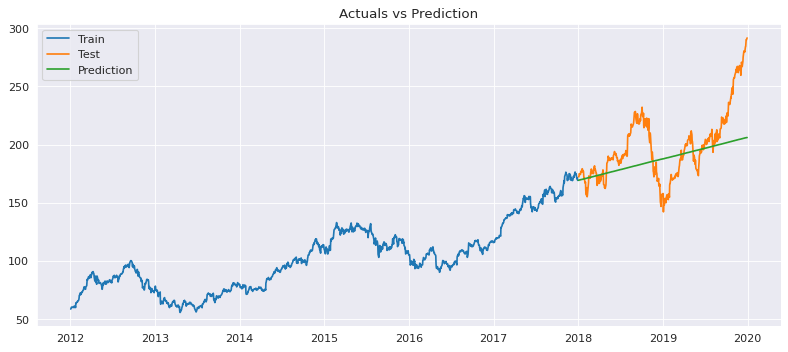

In [107]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [108]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
mse = mean_squared_error(test_pred.Close,data_test.Close)
rmse = np.round(np.sqrt(mse),2)

In [109]:
mape = np.round(mean_absolute_percentage_error(test_pred.Close,data_test.Close),3)
print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  26.81

 MAPE =  0.103


In [111]:
forecast = arima_fit.predict(len(data_close),len(data_close)+29,typ='levels')
forecast_df = pd.DataFrame(forecast)
forecast_df.columns=['Close']
forecast_df

,Close
2010,291.666780
2011,291.697299
2012,291.810398
2013,291.930679
2014,292.046638
2015,292.162163
2016,292.277913
2017,292.393689
2018,292.509454
2019,292.625217


,Close
2010,291.666780
2011,291.697299
2012,291.810398
2013,291.930679
2014,292.046638
2015,292.162163
2016,292.277913
2017,292.393689
2018,292.509454
2019,292.625217


In [112]:
date = pd.date_range('2020-01-01',periods=30, freq='B')
date_df = pd.DataFrame(date,columns=['Date'])

In [113]:
data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

,Close
Date,
2020-01-01,291.666780
2020-01-02,291.697299
2020-01-03,291.810398
2020-01-06,291.930679
2020-01-07,292.046638
2020-01-08,292.162163
2020-01-09,292.277913
2020-01-10,292.393689
2020-01-13,292.509454


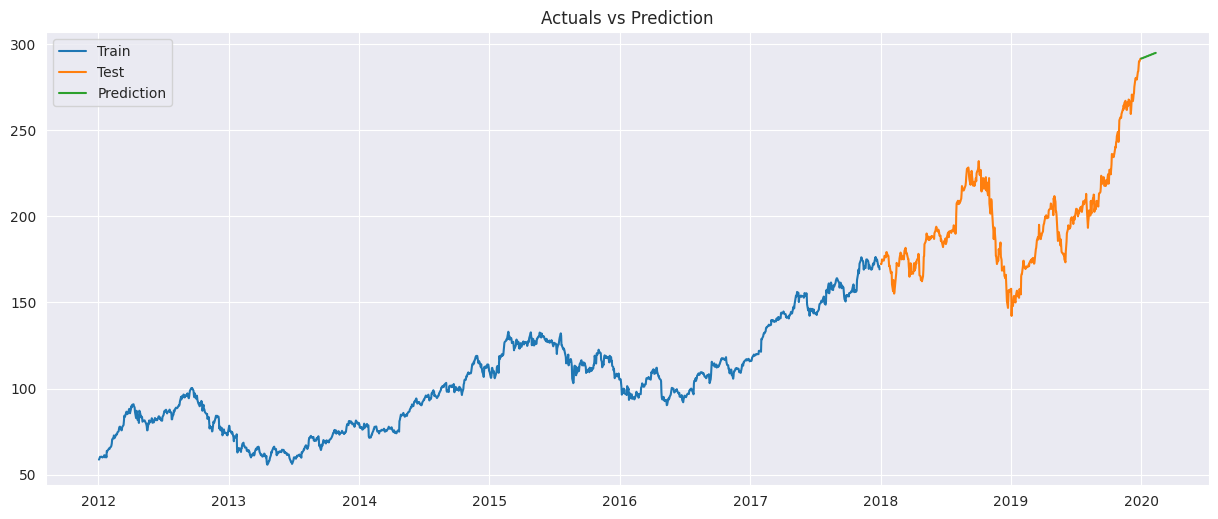

In [114]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(data_forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

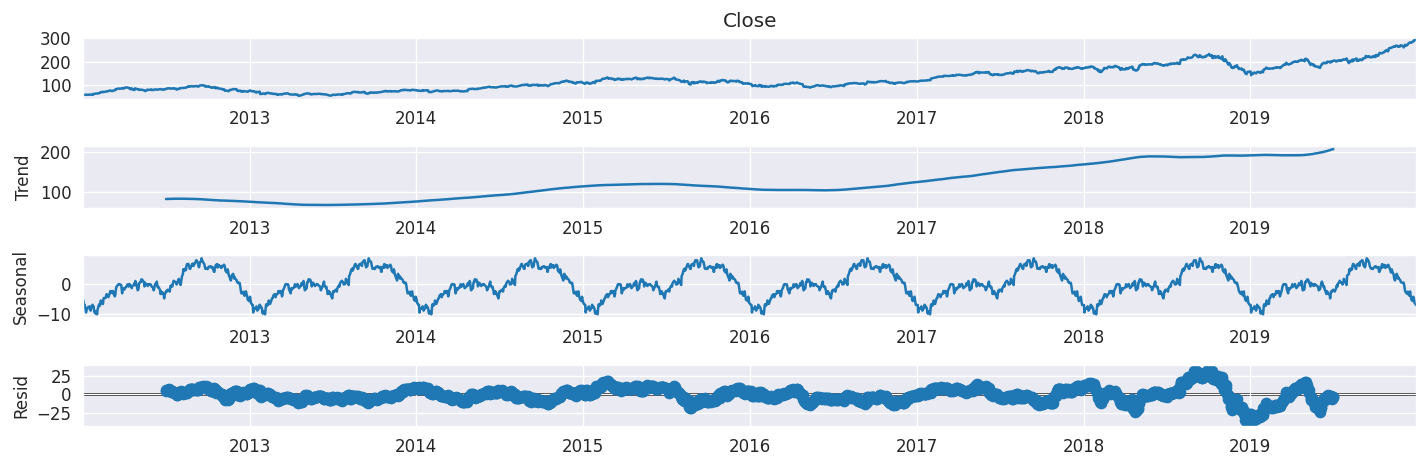

In [115]:
sd = seasonal_decompose(data_close['Close'],period=251)
sd.plot()
plt.show()

Sarimax  model

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

model_sarima = sm.tsa.SARIMAX(data_train.Close,order=(2,1,0),seasonal_order=(1,1,0,63),enforce_invertibility=False,enforce_stationarity=False)
sarima_fit = model_sarima.fit()

In [117]:
sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1509
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 63)   Log Likelihood               -2814.964
Date:                            Mon, 05 Dec 2022   AIC                           5637.928
Time:                                    12:55:50   BIC                           5658.847
Sample:                                         0   HQIC                          5645.754
                                           - 1509                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0140      0.023      0.595      0.552      -0.032       0.060
ar.L2         -0.0516      0.028     -1.872      0.061      -0.106       0.002
ar.S.L63      -0.5344      0.019    -28.075      0.000      -0.572      -0.497
sigma2         3.4618      0.079     43.641      0.000       3.306       3.617
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               719.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            -0.00
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
# Predicting for data_test
prediction = sarima_fit.predict(len(data_train),len(data_train)+501)
prediction

1509    168.667110
1510    169.417301
1511    168.233889
1512    169.891853
1513    170.319673
           ...    
2006    278.560898
2007    278.473613
2008    278.010026
2009    276.002143
2010    276.398860
Name: predicted_mean, Length: 502, dtype: float64

In [127]:
test_prediction= pd.DataFrame(prediction)
test_prediction.columns = ['Close']
test_prediction.index = data_test.index
test_prediction

,Close
Date,
2018-01-02,168.667110
2018-01-03,169.417301
2018-01-04,168.233889
2018-01-05,169.891853
2018-01-08,170.319673
...,...
2019-12-23,278.560898
2019-12-24,278.473613
2019-12-26,278.010026


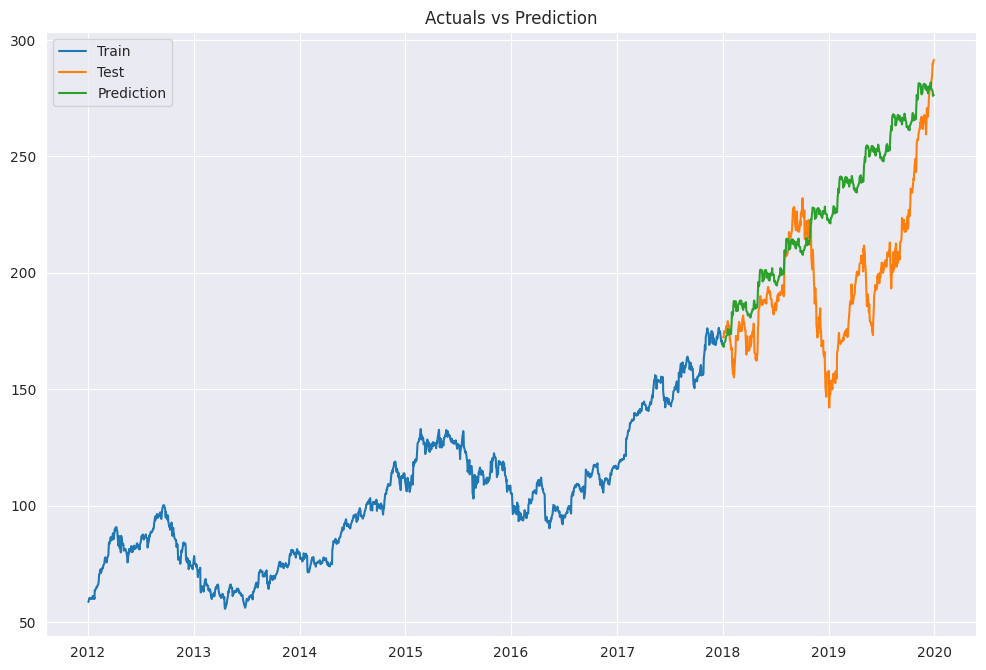

In [128]:
plt.figure(figsize=(12,8), dpi=100)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_prediction, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [129]:
rmse = np.round(np.sqrt(mean_squared_error(data_test.Close,test_prediction.Close)),2)
mape = np.round(mean_absolute_percentage_error(test_prediction.Close,data_test.Close),3)

print('\n RMSE = ',rmse)
print('\n MAPE = ', mape)


 RMSE =  39.34

 MAPE =  0.133


In [130]:
# Forecasting for next 30 days
forecast = sarima_fit.predict(len(data_close),len(data_close)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['Close']
forecast_df

,Close
2011,276.384134
2012,275.464765
2013,274.989369
2014,275.711816
2015,274.591858
2016,276.337017
2017,276.585693
2018,277.101427
2019,277.213877
2020,278.346204


In [131]:
# Set appropriate date as index for plotting forecast data
datetime = pd.date_range('2020-01-01', periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['Date'])

data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

,Close
Date,
2020-01-01,276.384134
2020-01-02,275.464765
2020-01-03,274.989369
2020-01-06,275.711816
2020-01-07,274.591858
2020-01-08,276.337017
2020-01-09,276.585693
2020-01-10,277.101427
2020-01-13,277.213877


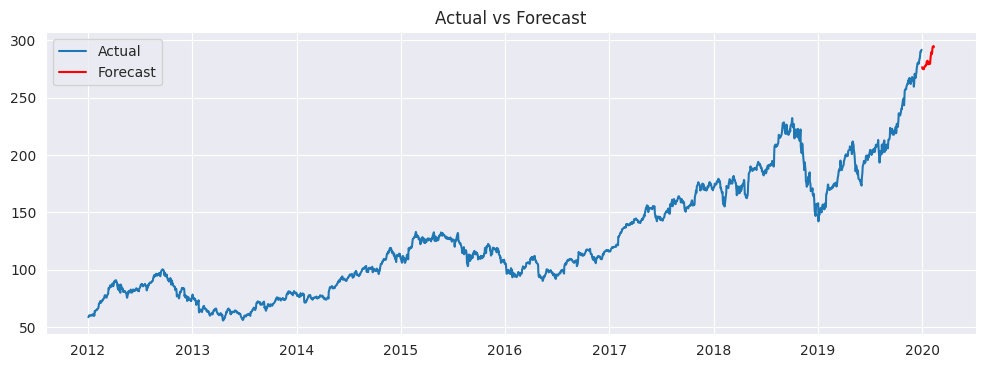

In [132]:
plt.figure(figsize=(12,4), dpi=100)
plt.plot(data_close, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()